# Part 1: Cleaning and EDA for SVD Recommender System 

## Cleaning

#### Cleaning for song df
- Remove duplicates
- Handle Null values
- Impute for null values where possible
- Make decision on other null values that can't be imputed

#### Cleaning for triplets df
- Check for duplicates
- Check for nulls

## EDA
1. Songs with most listens (top 10) + visualisation
2. Highest average number of listens (top 10)
3. Songs with highest different number of listeners (unique listeners - top 10)
4. Artists with most listens + visualisation (top 10)
5. Artists with highest average number of plays (top 10)
6. Most polarising songs (largest std in listen count)
7. Analysis by year

####  Item-item relationships - Cosine Similarity
- Create csr matrix
- Pass into cosine similarity 
- Form data frame
- Filter for top 10 songs song_ids
- Convert song_ids to title + artist
- Filter for threshold level of similarity
- Visualise similarites in Heatmap

#### User-item relationships - Cosine Similarity
- Review listen count statstics
- Filter for listen counts under median
- Filter matrix
- Sample matrix to handle user quantity
- Get cosine similarity for sample
- Sample 10 columns and analyse similairty to all other users
- Show on heatmap





In [34]:
import pandas as pd
from scipy.sparse import csr_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.2f}'.format)
from scipy.stats import zscore

In [2]:
# Import datasets

In [3]:
song_df = pd.read_csv(r'C:\Users\Ollie\Downloads\song_data.csv')
triplets_df = pd.read_csv(r'C:/Users/Ollie/Downloads/triplets_file.csv')

In [4]:
# View Song Data - this is all the songs names, artist names, release year and song id

In [5]:
song_df

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
...,...,...,...,...,...
999995,SOTXAME12AB018F136,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0
999996,SOXQYIQ12A8C137FBB,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0
999998,SOLXGOR12A81C21EB7,Faraday,The Trance Collection Vol. 2,Elude,0


In [6]:
song_df['song_id'].nunique()

999056

In [7]:
# View other dataframe of users, song_id's and listen counts for each

In [8]:
triplets_df

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1


In [9]:
# -- Handle duplicates and null values in either dataframe --

In [10]:
# Song_df first, nunique() on 'song_id' being lower than total rows means there must be duplicates
song_df['song_id'].nunique()

999056

In [11]:
# Duplicates where song_id and artist_name are equal
duplicates = song_df[song_df.duplicated(subset=['song_id'])]
duplicates.sort_values(['artist_name'])

,song_id,title,release,artist_name,year
907282,SOYWFPT12AB018742C,Landing In London,Landing In London,3 Doors Down,2005
944290,SOUZNSP12A6701FBD5,It's Not Me,Seventeen Days,3 Doors Down,2003
466874,SOUEHCD12AB0188F80,Here Without You,Acoustic EP,3 Doors Down,2002
886850,SOGHVAN12A81C228BA,Man Down (Censored),Curtis,50 Cent,2007
564397,SOCQKVJ12AB017B52C,God Gave Me Style,The Massacre,50 Cent,2005
...,...,...,...,...,...
637540,SOEYSCL12A8C131F19,Space Rock,Maladroit,Weezer,2002
662376,SOZHPEI12A8C138502,Dreamin',Weezer (Red Album),Weezer,2008
399501,SOCRCNK12A8C133AA7,Your Woman,Women In Technology,White Town,1996
233017,SOHBZKL12A6D4F9354,Down On My Head,Lights And Sounds,Yellowcard,2006


In [12]:
# We can see from the below that there are instances where song_id and artist name are the same
# But the song is actually a different version with another artist
# Ideally we distinguish between these as they could reflect preferences however our user-item df only has song_id
# This means there is no way to know which version they listened to, and thus derive a more informed recommendation 
# Therefore we will need to simply drop any duplicates on song_id, so that all song_id's are unique.
# This however should still be fairly accurate as a recommendation. 
duplicates[duplicates['song_id']=='SOKBIIQ12AB017FEFC']

,song_id,title,release,artist_name,year
827195,SOKBIIQ12AB017FEFC,Did It Again,Superventas 2010,Shakira,2009
912127,SOKBIIQ12AB017FEFC,Did It Again (featuring Kid Cudi),She Wolf,Shakira,2009


In [13]:
# Drop where song_id is duplicated 
song_df = song_df.drop_duplicates(subset=['song_id'])

In [14]:
song_df

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
...,...,...,...,...,...
999995,SOTXAME12AB018F136,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0
999996,SOXQYIQ12A8C137FBB,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0
999998,SOLXGOR12A81C21EB7,Faraday,The Trance Collection Vol. 2,Elude,0


In [15]:
# -- Handle song_df null values -- 

In [16]:
# Check null values, a few have been found
song_df.isnull().sum()

song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

In [17]:
# Identify these rows
rows_with_na = song_df[song_df.isna().any(axis=1)]
rows_with_na

,song_id,title,release,artist_name,year
64262,SOVICLT12A58A7C4D0,NaN,Of Flies And Men,Milton,0
114672,SOAGRAA12AB018D567,NaN,Puce de luxe,Sébastien Roch,0
138011,SOOBGAQ12A6D4F6762,Solitude,NaN,Metro,0
197822,SOGFJER12A6D4F675F,All The Beautiful People,NaN,Metro,0
223019,SOAFJBH12A6D4F6765,Down The Aisles,NaN,Metro,0
229353,SOOAFJX12AB018A028,NaN,Puce de luxe,Sébastien Roch,0
264639,SOLDTFD12AB018AFE6,NaN,Puce de luxe,Sébastien Roch,0
458083,SOAUTVB12AB018AFF0,NaN,Puce de luxe,Sébastien Roch,0
557125,SOMPGYE12AB018AFE0,NaN,Puce de luxe,Sébastien Roch,0
578241,SOVHAZH12AB018D5B3,NaN,Puce de luxe,Sébastien Roch,0


In [18]:
# Interestingly almost all NaNs (12/15) on title are from the same artist and the same release, Sebastien Roch - Puce de Luxe
# As we have unique song ids for this we can fill these with Track 1, Track 2,... 
# The user can then deduce themselves which song on the album release that it is

In [19]:
# Grab NaN rows from this release/artist, calling just the artist and release is enough to find all 12 of their NaNs
imputable_nan = song_df[(song_df['artist_name']== 'Sébastien Roch') & (song_df['release']=='Puce de luxe')]
imputable_nan

,song_id,title,release,artist_name,year
114672,SOAGRAA12AB018D567,NaN,Puce de luxe,Sébastien Roch,0
229353,SOOAFJX12AB018A028,NaN,Puce de luxe,Sébastien Roch,0
264639,SOLDTFD12AB018AFE6,NaN,Puce de luxe,Sébastien Roch,0
458083,SOAUTVB12AB018AFF0,NaN,Puce de luxe,Sébastien Roch,0
557125,SOMPGYE12AB018AFE0,NaN,Puce de luxe,Sébastien Roch,0
578241,SOVHAZH12AB018D5B3,NaN,Puce de luxe,Sébastien Roch,0
652287,SOECGBQ12AB018D582,NaN,Puce de luxe,Sébastien Roch,0
697789,SOTJWHR12AB018D5A0,NaN,Puce de luxe,Sébastien Roch,0
795481,SOSFNKO12AB018D5BB,NaN,Puce de luxe,Sébastien Roch,0
853170,SOASSAS12AB018AFCF,NaN,Puce de luxe,Sébastien Roch,0


In [20]:
# Fill values with for loop for all twelve NaNs
song_df.loc[imputable_nan.index, 'title'] = [f'Title {i+1}' for i in range(len(imputable_nan))]

C:\Users\Ollie\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [21]:
# Check nulls again
song_df[song_df.isna().any(axis=1)]

,song_id,title,release,artist_name,year
64262,SOVICLT12A58A7C4D0,NaN,Of Flies And Men,Milton,0
138011,SOOBGAQ12A6D4F6762,Solitude,NaN,Metro,0
197822,SOGFJER12A6D4F675F,All The Beautiful People,NaN,Metro,0
223019,SOAFJBH12A6D4F6765,Down The Aisles,NaN,Metro,0
693232,SOCKQGJ12A6D4F6768,Provincial,NaN,Metro,0
697813,SOBDDHR12AB01888A6,NaN,Grand Glam Outtakes,Remute,0
725270,SOFDILP12AC960A4EF,NaN,Recupera tus Clásicos - Fobia,Fobia,0
841107,SOSQKYC12A6D4F6763,Middlemen,NaN,Metro,0


In [22]:
# Remaining nulls on title can just be dropped 
song_df = song_df.dropna(subset=['title'])

In [23]:
# Nulls on release can be left as is, they do not stop us from recommending a song

In [24]:
# -- Triplets_df --
# data cleaning, handling duplicates and null values

In [25]:
triplets_df

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1


In [26]:
# User-Pair duplicates need to be aggregated together to properly form the sparse matrix 

In [27]:
# Run groupby on user_id and song_id to see how much the number of rows changes upon aggregation 
triplets_df.groupby(['user_id','song_id']).sum()

listen_count
user_id                                  song_id                         
00003a4459f33b92906be11abe0e93efc423c0ff SOJJRVI12A6D4FBE49             1
                                         SOKJWZB12A6D4F9487             4
                                         SOMZHIH12A8AE45D00             3
                                         SONFEUF12AAF3B47E3             3
                                         SOVMGXI12AF72A80B0             1
...                                                                   ...
fffea3d509760c984e7d40789804c0e5e289cc86 SOUBKFT12A6701F07A             1
                                         SOVPBLT12A6D4F5113             1
                                         SOVRQIK12A6701F118             1
                                         SOWEBRA12A6701F115             1
                                         SOZMNAX12A58A77F88             1

[2000000 rows x 1 columns]

In [28]:
# From this we can logically deduce with certainty that there are no user-song pair duplicates
# If there were then when aggregated, total rows would be less than 2,000,000

In [29]:
# We can run a duplicates function to verify this with python as well
triplets_df[triplets_df.duplicated(subset=['user_id','song_id'])]
# As predicted no results returned

,user_id,song_id,listen_count


In [34]:
# Check for null values, there are none
triplets_df.isnull().sum()

user_id         0
song_id         0
listen_count    0
dtype: int64

In [33]:
# Analyse listen_counts in triplets_df 
triplets_df['listen_count'].describe()

count   2000000.00
mean          3.05
std           6.58
min           1.00
25%           1.00
50%           1.00
75%           3.00
max        2213.00
Name: listen_count, dtype: float64

In [ ]:
# We can see from this we have some quite extreme outliers, the highest listen_count is 2213 while the average is 3 and median 1
# We will remove these from our dataset as it will mislead our model

In [37]:
# First we will calculate z-scores 
triplets_df['z-score'] = zscore(triplets_df['listen_count'])

In [39]:
# Remove any outliers with an absolute z score of more than 3
triplets_df = triplets_df[triplets_df['z-score'].abs() <= 3]

In [40]:
# View listen_count stats again
triplets_df['listen_count'].describe()

count   1973852.00
mean          2.54
std           3.04
min           1.00
25%           1.00
50%           1.00
75%           3.00
max          22.00
Name: listen_count, dtype: float64

In [ ]:
# The max listen_count for a particular song is now 22, with the mean dropping slightly to 2.54

In [ ]:
# -- EDA Section -- 

In [35]:
# -- EDA Contents --
# 1. Songs with most listens (top 10) + visualisation
# 2. Highest average number of listens (top 10)
# 3. Songs with highest different number of listeners (unique listeners - top 10)
# 4. Artists with most listens + visualisation (top 10)
# 5. Artists with highest average number of plays
# 6. Most polarising songs(largest std in listen count)
# 7. Analysis by year
# 8. Cosine Similarity




In [41]:
# Merge songs on triplets df 
merged_df = pd.merge(triplets_df, song_df, how='left', on='song_id')
merged_df

,user_id,song_id,listen_count,z-score,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,-0.31,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,-0.16,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,-0.31,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,-0.31,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,-0.31,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...,...
1973847,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,-0.16,Ignorance (Album Version),Ignorance,Paramore,0
1973848,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,0.15,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1973849,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,-0.01,What I've Done (Album Version),What I've Done,Linkin Park,2007
1973850,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,-0.31,Up,My Worlds,Justin Bieber,2010


In [42]:
triplets_df['listen_count'].sum()

5019340

In [43]:
merged_df['listen_count'].sum()

5019340

In [44]:
# Check for no song-user pair duplicates in newly merged df
merged_df[merged_df.duplicated(subset=['user_id','song_id'])]

,user_id,song_id,listen_count,z-score,title,release,artist_name,year


In [45]:
# 1. Songs with most listens (top 10)
songs_popular_10 = merged_df.groupby('song_id').agg({'listen_count': 'sum','title':'first','artist_name': 'first'}).reset_index().sort_values('listen_count', ascending=False).head(10)
songs_popular_10

,song_id,listen_count,title,artist_name
317,SOAUWYT12A81C206F1,28929,Undo,Björk
614,SOBONKR12A58A7A7E0,27754,You're The One,Dwight Yoakam
2220,SOFRQTD12A81C233C0,26943,Sehr kosmisch,Harmonia
7416,SOSXLTC12AF72A7F54,23099,Revelry,Kings Of Leon
352,SOAXGDH12A8C13F8A1,22726,Dog Days Are Over (Radio Edit),Florence + The Machine
1664,SOEGIYH12A6D4FC0E3,19359,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...
5531,SONYKOW12AB01849C9,18485,Secrets,OneRepublic
1334,SODJWHY12A8C142CCE,13943,Hey_ Soul Sister,Train
6246,SOPUCYA12A8C13A694,13876,Canada,Five Iron Frenzy
4448,SOLFXKT12AB017E3E0,13154,Fireflies,Charttraxx Karaoke


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

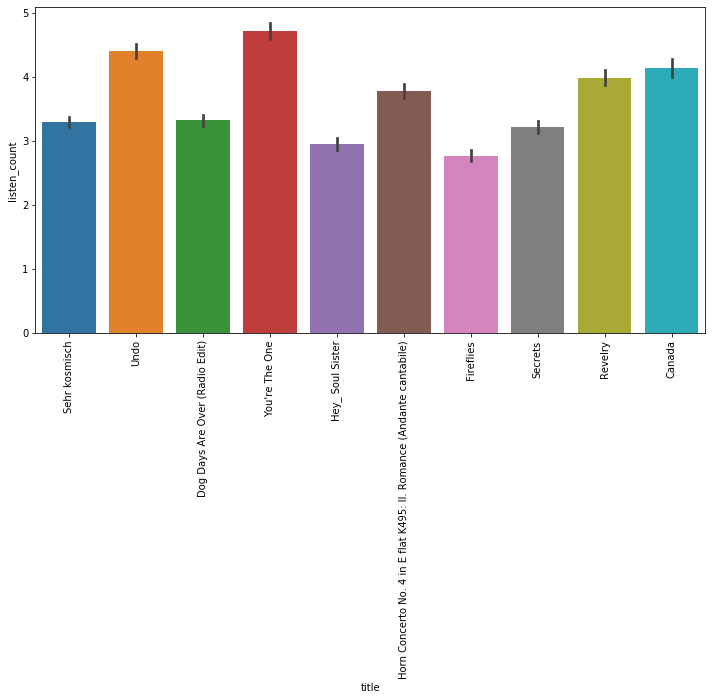

In [46]:
# Visualisation of top 10 listen counts
plt.figure(figsize=(12, 6))
top_10_df = triplets_df[triplets_df['song_id'].isin(songs_popular_10['song_id'].head(10))]
top_10_df = pd.merge(top_10_df, song_df[['song_id','title']], how = 'left', on='song_id')
sns.barplot(data = top_10_df[['title','listen_count']], x = 'title', y='listen_count')
plt.xticks(rotation=90)

In [47]:
# Highest average number of listens (top 10)
merged_df.groupby('song_id').agg({'listen_count': 'mean','title':'first','artist_name': 'first'}).reset_index().sort_values('listen_count', ascending=False).head(10)

,song_id,listen_count,title,artist_name
3374,SOINHRP12A8C1401FF,7.11,Novocaine,Kalafut
5079,SOMVIOV12A6D4F719A,6.71,Tennessee (Pirate Radio Mix),ARRESTED DEVELOPMENT
2287,SOFWKCI12A8C13A22A,6.63,Bros Sto Rimagmeno Spiti (2003 Digital Remaster),George Dalaras
3987,SOJZSWQ12A8C13BD47,6.37,Canción Para Luchar,León Gieco
32,SOACBLB12AB01871C7,6.34,221,keller williams
2659,SOGSDHY12AB017BF39,6.09,Working With Homesick,Homesick James
61,SOADQMO12A8C136FF9,6.07,Dumb Blood,Soft
8908,SOWYRXW12A8C1351CA,6.03,Bedroom Suite,Joe Christmas
1126,SOCWIJA12AB017FA92,5.90,Manuel,The Car Is On Fire
3859,SOJSXJY12A8C13E32E,5.70,Clara meets Slope - Hard To Say,Clara Hill


In [48]:
# Top 10 songs with highest different number of listeners
unique_user_counts = merged_df.groupby('title')['user_id'].nunique().reset_index()
merged_with_counts = pd.merge(merged_df, unique_user_counts, on='title')
top_10_songs_user = merged_with_counts[merged_with_counts['title'].isin(unique_user_counts.nlargest(10, 'user_id')['title'])]
top_10_songs_user = top_10_songs_user.drop_duplicates(subset=['title', 'artist_name'])
top_10_songs_user[['title', 'artist_name','user_id_y']].sort_values('user_id_y', ascending = False)

,title,artist_name,user_id_y
3886,Sehr kosmisch,Harmonia,8165
57156,Dog Days Are Over (Radio Edit),Florence + The Machine,6836
50591,Undo,Björk,6565
64209,You're The One,Dwight Yoakam,6177
64210,You're The One,The Black Keys,6177
93137,Revelry,Kings Of Leon,5794
87157,Secrets,OneRepublic,5752
76573,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...,5110
82405,Fireflies,Charttraxx Karaoke,4752
71855,Hey_ Soul Sister,Train,4718


In [49]:
# Artists with most listens (top 10)
artist_10 = merged_df.groupby('artist_name').agg({'listen_count': 'sum'}).reset_index().sort_values('listen_count', ascending=False).head(10)
artist_10

,artist_name,listen_count
649,Coldplay,65045
1107,Florence + The Machine,51885
1651,Kings Of Leon,48863
2850,The Black Keys,46381
1370,Jack Johnson,40183
1554,Justin Bieber,35236
2205,OneRepublic,34696
3174,Train,33593
2073,Muse,33580
345,Björk,32412


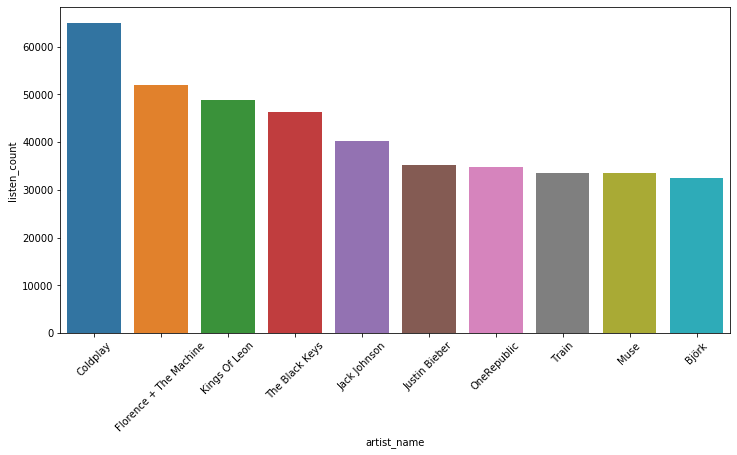

In [50]:
# Visualisation of top 10 artists
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.barplot(data = artist_10, x = 'artist_name', y = 'listen_count')

In [51]:
# Artists with highest average number of plays
merged_df.groupby('artist_name').agg({'listen_count': 'mean'}).reset_index().sort_values('listen_count', ascending=False).head(10)

,artist_name,listen_count
1574,Kalafut,7.11
1187,George Dalaras,6.63
1741,León Gieco,6.37
3368,keller williams,6.34
1305,Homesick James,6.09
2670,Soft,6.07
1457,Joe Christmas,6.03
2863,The Car Is On Fire,5.90
630,Clara Hill,5.70
493,CREMATORY,5.67


In [52]:
# Most polarising songs, largest std in listen count
merged_df.groupby('song_id').agg({'listen_count': 'std','title':'first','artist_name': 'first'}).reset_index().sort_values('listen_count', ascending=False).head(10)

,song_id,listen_count,title,artist_name
1823,SOERPRE12A58A7E653,7.06,Scissors (Album Version),Slipknot
32,SOACBLB12AB01871C7,6.03,221,keller williams
3374,SOINHRP12A8C1401FF,5.94,Novocaine,Kalafut
61,SOADQMO12A8C136FF9,5.92,Dumb Blood,Soft
92,SOAFPSO12AF72A4521,5.90,Caroline,CREMATORY
5240,SONGBWJ12A58A7AB4D,5.79,Rock 'n' Roll,Generation X
5213,SONENUZ12A8C14230C,5.75,Tenderly,Euge Groove
2287,SOFWKCI12A8C13A22A,5.74,Bros Sto Rimagmeno Spiti (2003 Digital Remaster),George Dalaras
9733,SOZEBAZ12AF72A80C8,5.62,Voices On A String (Album Version),Thursday
1126,SOCWIJA12AB017FA92,5.62,Manuel,The Car Is On Fire


In [53]:
merged_df

,user_id,song_id,listen_count,z-score,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,-0.31,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,-0.16,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,-0.31,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,-0.31,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,-0.31,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...,...
1973847,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,-0.16,Ignorance (Album Version),Ignorance,Paramore,0
1973848,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,0.15,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1973849,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,-0.01,What I've Done (Album Version),What I've Done,Linkin Park,2007
1973850,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,-0.31,Up,My Worlds,Justin Bieber,2010


In [54]:
# Analysis by Decade
def decade(row):
    return (row['year']//10)*10

# Create column for decade with apply
merged_df['decade'] = merged_df.apply(decade, axis=1)     

In [55]:
merged_df.head()

,user_id,song_id,listen_count,z-score,title,release,artist_name,year,decade
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,-0.31,The Cove,Thicker Than Water,Jack Johnson,0,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,-0.16,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,1970
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,-0.31,Stronger,Graduation,Kanye West,2007,2000
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,-0.31,Constellations,In Between Dreams,Jack Johnson,2005,2000
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,-0.31,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,1990


In [56]:
# Total listen_counts by each decade
listens_decades = merged_df[['listen_count','decade']].groupby('decade').sum()
listens_decades = listens_decades.reset_index()
listens_decades = listens_decades[listens_decades['decade']!=0]
listens_decades

,decade,listen_count
1,1950,6427
2,1960,67338
3,1970,162892
4,1980,259999
5,1990,652206
6,2000,2710059
7,2010,165160


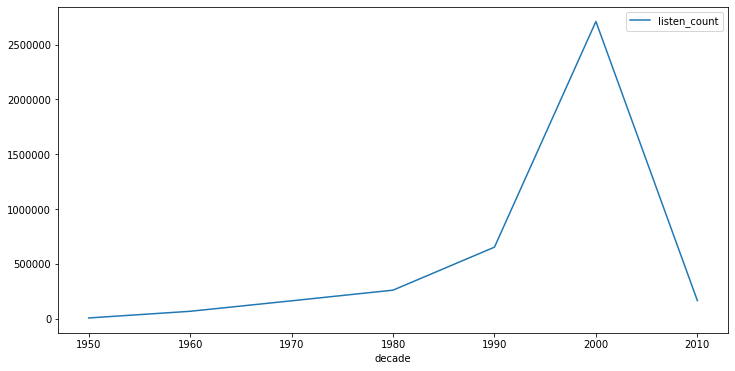

In [57]:
# Visualise total listens by decade
listens_decades.plot(kind = 'line', x = 'decade', y = 'listen_count', figsize=(12,6) )

In [58]:
# Total unique users by decade 
unique_decade = merged_df[['user_id','decade']].groupby('decade').nunique().reset_index()
unique_decade

,decade,user_id
0,0,66396
1,1950,2008
2,1960,15267
3,1970,30352
4,1980,38256
5,1990,58423
6,2000,73833
7,2010,25540


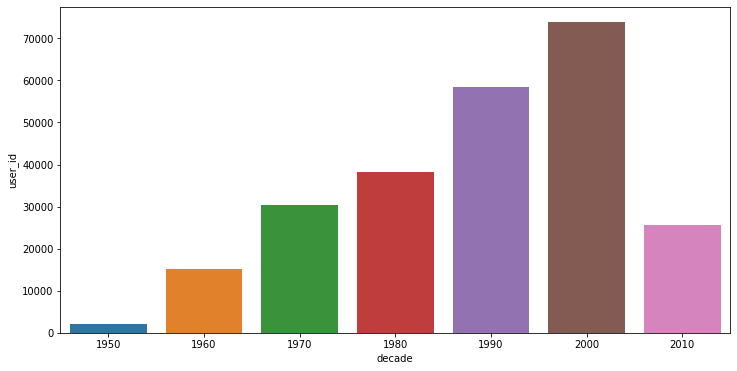

In [59]:
# Visualisation of number of unique users by decade 
plt.figure(figsize=(12,6))
sns.barplot(data = unique_decade[unique_decade['decade']!=0], x = 'decade', y = 'user_id' )

In [60]:
# Number of different songs each decade
no_songs_decade = merged_df[['song_id','decade']].groupby('decade').nunique().reset_index()
no_songs_decade

,decade,song_id
0,0,1773
1,1950,17
2,1960,147
3,1970,326
4,1980,561
5,1990,1356
6,2000,5534
7,2010,286


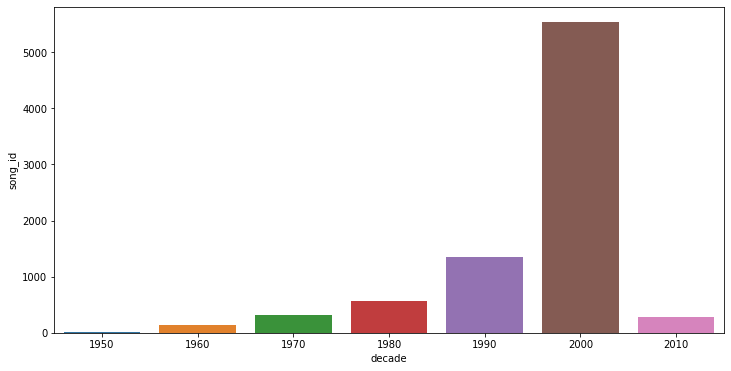

In [61]:
# Visualisation of number of different songs by each decade
plt.figure(figsize=(12,6))
sns.barplot(data = no_songs_decade[no_songs_decade['decade']!=0], x = 'decade', y = 'song_id' )

In [62]:
# average listen count by year
avg_lc_year = merged_df[['listen_count','year']].groupby('year').mean().reset_index()
avg_lc_year

,year,listen_count
0,0,2.72
1,1954,2.82
2,1955,1.54
3,1956,2.20
4,1957,1.99
5,1958,3.19
6,1959,2.25
7,1960,3.07
8,1961,3.07
9,1962,3.00


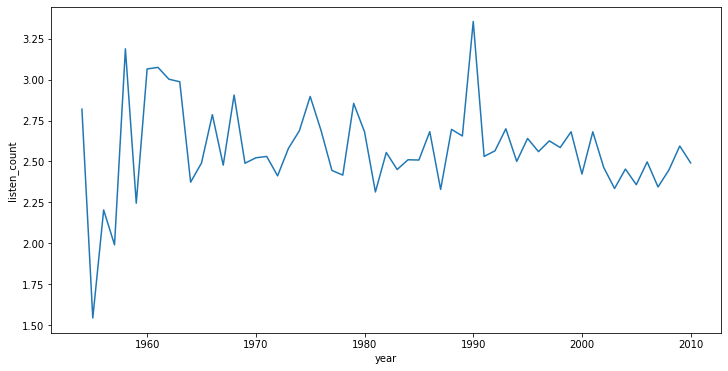

In [63]:
# Visualisation of Average listen count 
plt.figure(figsize=(12,6))
sns.lineplot(data = avg_lc_year[avg_lc_year['year']!=0], x = 'year', y='listen_count')

In [64]:
# -- Analysis -- 
# Despite the 2000s decade having the highest listen count and containing a lot of the most popular artists, average listen counts are much higher for 1958, 1960, 1975 and 1990 
# This is partly due to 1958, 1975 having fewer song counts and users overall so if there a few very keen listeners, for a small amount of songs it pushes the average up.
# This is also the case for 1990 which has comparitivley few different songs, concentrating the listen counts over a smaller number and increasing the average
# Interstingly though 1990 has a fairly similar amount of unique users to the 2000s, suggesting some of its individual songs are more popular from the 90s

In [65]:
# Analyse user and item relationships with Cosine Similarity

In [66]:
# 1. item-item similarity 

In [67]:
# Create CSR Sparse Matrix
from sklearn.metrics.pairwise import cosine_similarity

In [68]:
# Convert to categorical variables
triplets_df['user_id'] = triplets_df['user_id'].astype('category')
triplets_df['song_id'] = triplets_df['song_id'].astype('category')

C:\Users\Ollie\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ollie\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
# Get indicies for CSR matrix
row_indices = triplets_df['user_id'].cat.codes
col_indices = triplets_df['song_id'].cat.codes

In [70]:
# Define sparse matrix 
sparse_matrix = csr_matrix((triplets_df['listen_count'], (row_indices, col_indices)),shape=(triplets_df['user_id'].nunique(), triplets_df['song_id'].nunique()))

In [71]:
# Get item-item cosine similarity 
item_item_similarity = cosine_similarity(sparse_matrix.T)
# Get original song titles
song_id = triplets_df['song_id'].cat.categories 

In [72]:
# Create a DataFrame for easier analysis and visualization
item_similarity_df = pd.DataFrame(item_item_similarity, index=song_id, columns= song_id)
item_similarity_df

,SOAAAGQ12A8C1420C8,SOAACPJ12A81C21360,SOAACSG12AB018DC80,SOAAEJI12AB0188AB5,SOAAFAC12A67ADF7EB,SOAAFYH12A8C13717A,SOAAJMQ12A6D4F7D17,SOAAKPM12A58A77210,SOAALWN12A6D4F7FDA,SOAAMOW12AB018149B,...,SOZZKPR12A6D4F8147,SOZZLTY12A67AE0AD0,SOZZLZN12A8AE48D6D,SOZZRHE12A6702165F,SOZZTCU12AB0182C58,SOZZTNF12A8C139916,SOZZVWB12AB0189C30,SOZZWZV12A67AE140F,SOZZYAO12A6701FF36,SOZZZPV12A8C1444B5
SOAAAGQ12A8C1420C8,1.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SOAACPJ12A81C21360,0.01,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SOAACSG12AB018DC80,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SOAAEJI12AB0188AB5,0.00,0.00,0.00,1.00,0.01,0.01,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
SOAAFAC12A67ADF7EB,0.00,0.00,0.00,0.01,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SOZZTNF12A8C139916,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
SOZZVWB12AB0189C30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.01,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
SOZZWZV12A67AE140F,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
SOZZYAO12A6701FF36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [73]:
# Filter for cosine similarities of the top 10 most popular songs, with the rest of the data set
pop_song_list = songs_popular_10['song_id'].tolist()
item_similarity_df_10 = item_similarity_df[pop_song_list]
item_similarity_df_10

,SOAUWYT12A81C206F1,SOBONKR12A58A7A7E0,SOFRQTD12A81C233C0,SOSXLTC12AF72A7F54,SOAXGDH12A8C13F8A1,SOEGIYH12A6D4FC0E3,SONYKOW12AB01849C9,SODJWHY12A8C142CCE,SOPUCYA12A8C13A694,SOLFXKT12AB017E3E0
SOAAAGQ12A8C1420C8,0.01,0.01,0.00,0.02,0.01,0.03,0.01,0.00,0.00,0.00
SOAACPJ12A81C21360,0.01,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.02,0.00
SOAACSG12AB018DC80,0.00,0.01,0.02,0.01,0.00,0.01,0.00,0.02,0.00,0.00
SOAAEJI12AB0188AB5,0.01,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00
SOAAFAC12A67ADF7EB,0.01,0.01,0.02,0.01,0.02,0.01,0.01,0.01,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...
SOZZTNF12A8C139916,0.02,0.02,0.01,0.02,0.02,0.02,0.02,0.01,0.02,0.01
SOZZVWB12AB0189C30,0.02,0.02,0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.00
SOZZWZV12A67AE140F,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00
SOZZYAO12A6701FF36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [74]:
# Get this df but with song titles and artist_name
song_df['title_artist'] = song_df['title'] + ' - ' + song_df['artist_name'] 
song_df.head()

C:\Users\Ollie\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,song_id,title,release,artist_name,year,title_artist
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003,Silent Night - Faster Pussy cat
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995,Tanssi vaan - Karkkiautomaatti
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006,No One Could Ever - Hudson Mohawke
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003,Si Vos Querés - Yerba Brava
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0,Tangle Of Aspens - Der Mystic


In [75]:
# Create dictionary zipping song_id to now concatenated title and artist
id_to_title_artist = dict(zip(song_df['song_id'], song_df['title_artist']))
item_similarity_df_10 = item_similarity_df_10.rename(index=id_to_title_artist, columns=id_to_title_artist)
item_similarity_df_10

,Undo - Björk,You're The One - Dwight Yoakam,Sehr kosmisch - Harmonia,Revelry - Kings Of Leon,Dog Days Are Over (Radio Edit) - Florence + The Machine,Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile) - Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner,Secrets - OneRepublic,Hey_ Soul Sister - Train,Canada - Five Iron Frenzy,Fireflies - Charttraxx Karaoke
Orgelblut - Bohren & Der Club Of Gore,0.01,0.01,0.00,0.02,0.01,0.03,0.01,0.00,0.00,0.00
Cearc Agus Coileach / The Hen And Cock - Mícheál Ó Súilleabháin,0.01,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.02,0.00
I Gotta Feeling (Edit) - The Black Eyed Peas,0.00,0.01,0.02,0.01,0.00,0.01,0.00,0.02,0.00,0.00
Godlovesugly - Atmosphere,0.01,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00
Rome Wasn't Built In A Day - Morcheeba,0.01,0.01,0.02,0.01,0.02,0.01,0.01,0.01,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...
Le Million - Ste Strausz,0.02,0.02,0.01,0.02,0.02,0.02,0.02,0.01,0.02,0.01
Recovered - Marco V,0.02,0.02,0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.00
Henrietta - The Fratellis,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00
Sunset (Bird Of Prey) - Fatboy Slim,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [76]:
# Filter for highest cosine similarity, try example with 'Secrets - One Republic'
item_similarity_df_10['Secrets - OneRepublic'].sort_values(ascending = False).head(10)

Secrets - OneRepublic                                     1.00
Sehr kosmisch - Harmonia                                  0.36
Fireflies - Charttraxx Karaoke                            0.31
Dog Days Are Over (Radio Edit) - Florence + The Machine   0.31
All The Right Moves - OneRepublic                         0.29
Marry Me - Train                                          0.28
Hey_ Soul Sister - Train                                  0.28
OMG - Usher featuring will.i.am                           0.28
Use Somebody - Kings Of Leon                              0.25
The Only Exception (Album Version) - Paramore             0.24
Name: Secrets - OneRepublic, dtype: float64

In [77]:
# Upon seeing the highest cosine similarities, typically the higest 20 or 10 in the set are over 0.1

In [83]:
# Filter for only values greater that 0.1 and less than 1, (1.0 will certainly be a comparison with itself)
similarity_enough = item_similarity_df_10[(item_similarity_df_10 < 0.999) & (item_similarity_df_10> 0.2)]
# Drop rows where every value is NaN (only 1 or less than 0.1)
similarity_enough = similarity_enough.dropna(how = 'all')
similarity_enough

,Undo - Björk,You're The One - Dwight Yoakam,Sehr kosmisch - Harmonia,Revelry - Kings Of Leon,Dog Days Are Over (Radio Edit) - Florence + The Machine,Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile) - Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner,Secrets - OneRepublic,Hey_ Soul Sister - Train,Canada - Five Iron Frenzy,Fireflies - Charttraxx Karaoke
Undo - Björk,NaN,0.40,NaN,0.42,NaN,0.28,NaN,NaN,NaN,NaN
Dog Days Are Over (Radio Edit) - Florence + The Machine,NaN,NaN,0.30,NaN,NaN,NaN,0.31,0.23,NaN,0.23
Lucky (Album Version) - Jason Mraz & Colbie Caillat,NaN,NaN,0.21,NaN,NaN,NaN,0.22,0.23,NaN,0.21
You're The One - Dwight Yoakam,0.40,NaN,NaN,0.37,NaN,0.24,NaN,NaN,NaN,NaN
Bleed It Out [Live At Milton Keynes] - Linkin Park,NaN,NaN,NaN,NaN,NaN,NaN,0.21,NaN,NaN,0.21
Somebody To Love - Justin Bieber,NaN,NaN,0.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hey_ Soul Sister - Train,NaN,NaN,0.30,NaN,0.23,NaN,0.28,NaN,NaN,0.32
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile) - Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner,0.28,0.24,NaN,0.29,NaN,NaN,NaN,NaN,NaN,NaN
Sehr kosmisch - Harmonia,NaN,NaN,NaN,NaN,0.30,NaN,0.36,0.30,NaN,0.32
Vanilla Twilight - Owl City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27


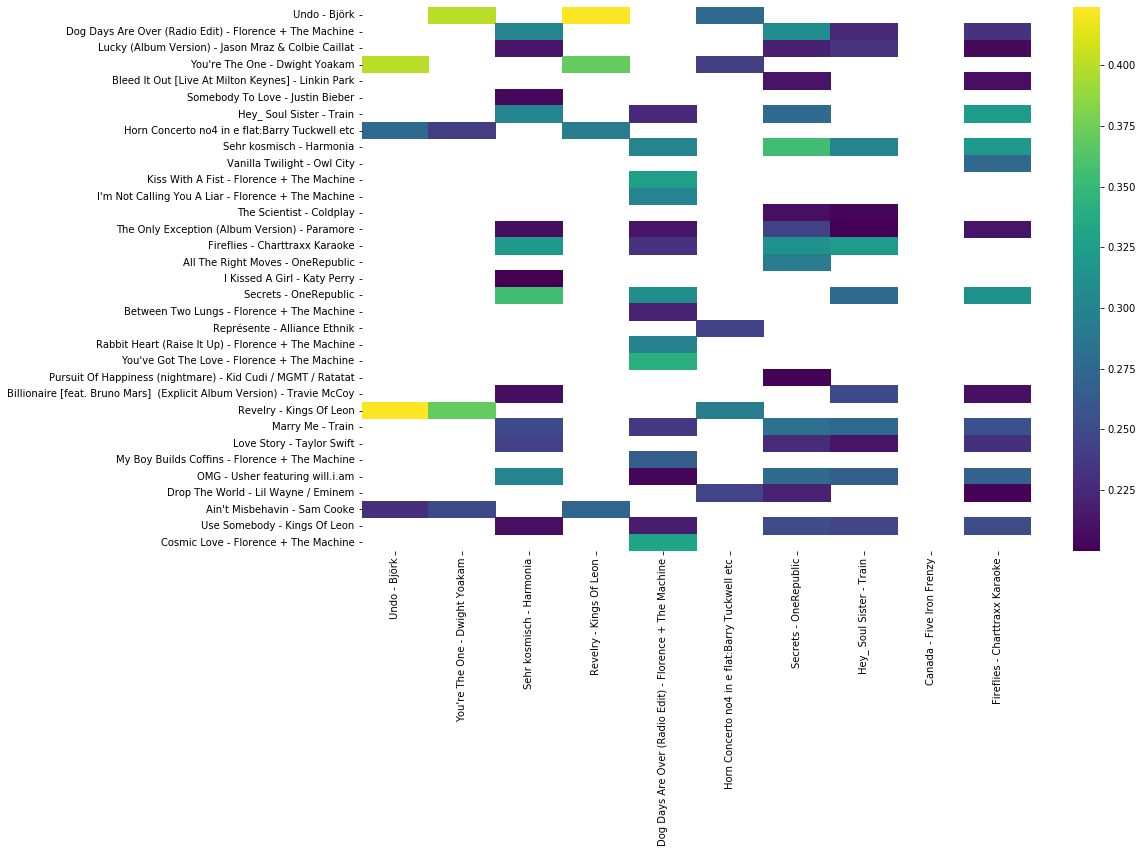

In [85]:
# Visualise songs with similarity over 0.2 with one of the top 10 using a heatmap
df_custom = similarity_enough.copy()
# Rename the hugely long title with a shorter version
df_custom.rename(columns={'Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile) - Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner': 'Horn Concerto no4 in e flat:Barry Tuckwell etc'}, inplace=True)
df_custom.rename(index={'Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile) - Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner': 'Horn Concerto no4 in e flat:Barry Tuckwell etc'}, inplace=True)
plt.figure(figsize=(15, 10))
sns.heatmap(data = df_custom, cmap = 'viridis')

In [86]:
# 2. User-User Cosine similarity analysis

In [87]:
# See number of different users
triplets_df['user_id'].nunique()
# This is too large to form a dataframe of every interaction, there would be 76,353^2 floats

76328

In [88]:
# However many of these users are not worth including 
# A lot of them have only a few listens, its not worth drawing conclusions or similarities between these users.

In [90]:
# See how many listens each user has
user_grouped = triplets_df.groupby('user_id')['listen_count'].sum()
user_grouped.head()

user_id
00003a4459f33b92906be11abe0e93efc423c0ff    17
00005c6177188f12fb5e2e82cdbd93e8a3f35e64     6
00030033e3a2f904a48ec1dd53019c9969b6ef1f    24
0007235c769e610e3d339a17818a5708e41008d9    30
0007c0e74728ca9ef0fe4eb7f75732e8026a278b    10
Name: listen_count, dtype: int64

In [92]:
# Analyse describe stastics to see averages and quartile
user_grouped.describe()

# We can see that the average is 65 listens, while 50% have less than 37. 
# We can't really draw similarities very accuaractly from people with a very low listen count
# If someone only has 1 listen of a song and another happens to have listened to only that song once, they will have perfect cosine similarity
# In reality they might not have similar preferences at all. 

count   76328.00
mean       65.76
std        85.60
min         1.00
25%        17.00
50%        37.00
75%        80.00
max      2334.00
Name: listen_count, dtype: float64

In [94]:
# Filter for users that are active enough such that they have at least the median number of listens
active_users = user_grouped[user_grouped >= 37].index

In [95]:
# Get sample of 5,000 from all users that meet this criteria
n_samples = 5000 
sampled_users = np.random.choice(active_users, n_samples, replace=False)

In [96]:
# Convert the user IDs in the triplets_df to categorical variables
triplets_df['user_id'] = triplets_df['user_id'].astype('category')

C:\Users\Ollie\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
# Map the sampled user IDs to their categorical codes (indices in the sparse matrix)
sampled_user_indices = triplets_df['user_id'].cat.codes[triplets_df['user_id'].isin(sampled_users)].unique()

In [98]:
# Filter original sparse_matrix to get only sampled users of over 41 listens
sampled_user_item_sparse_matrix = sparse_matrix[sampled_user_indices, :]

In [99]:
# Get cosine similarity using now filtered sparse_matrix
sampled_user_user_similarity = cosine_similarity(sampled_user_item_sparse_matrix)

In [100]:
# Convert to a DataFrame for easier handling
sampled_user_ids = triplets_df['user_id'].cat.categories[sampled_user_indices]
sampled_user_user_similarity_df = pd.DataFrame(sampled_user_user_similarity, index=sampled_user_ids, columns=sampled_user_ids)
sampled_user_user_similarity_df

,969cc6fb74e076a68e36a04409cb9d3765757508,4bd88bfb25263a75bbdd467e74018f4ae570e5df,b64cdd1a0bd907e5e00b39e345194768e330d652,a820d2d4f16bbd53be9e41e0417dfb234bfdfba8,bd8475385f0aa78830fa6dfce9e7242164b035c8,2c42e6551311710ca5a839d62058820a42ead493,3f9ed694a79835c921ef6d94acd28f876c1d901e,b4e32cdb654ab914a0ac73d2bbc5cae142da405a,ea07020bb223c733ccc55aa925ebcc25c4d97377,95942345306393998eb3a051ae5fa3c4d5afbaa4,...,3fe95fa31600137672e0ede4a8277c3ac62d96b6,fcdfda9294154d265211750d8c61cd494bbecab8,6a76f7237d1e4988bf23ed184c10b7a9d2f96974,888411ede2dc6306b05ba9f75f4edf26b3be57eb,a4f10e6da623ce3bf470fedff15b9b2d0032f72a,9fbce142d6707dae18898b16ffb8c41f6f80a7f6,613148566a2fd83e881ca467dd4caee075cf6141,6af523b1dff77e4269f5f575698c539966665060,f8dd34d31f233ea3837420220c55cf0acdad6382,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92
969cc6fb74e076a68e36a04409cb9d3765757508,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,...,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00
4bd88bfb25263a75bbdd467e74018f4ae570e5df,0.00,1.00,0.01,0.00,0.05,0.00,0.02,0.00,0.00,0.00,...,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.05
b64cdd1a0bd907e5e00b39e345194768e330d652,0.00,0.01,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
a820d2d4f16bbd53be9e41e0417dfb234bfdfba8,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
bd8475385f0aa78830fa6dfce9e7242164b035c8,0.00,0.05,0.01,0.00,1.00,0.00,0.06,0.01,0.07,0.02,...,0.00,0.00,0.07,0.03,0.00,0.14,0.02,0.08,0.04,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9fbce142d6707dae18898b16ffb8c41f6f80a7f6,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.06,0.07
613148566a2fd83e881ca467dd4caee075cf6141,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.03,0.00,...,0.00,0.00,0.01,0.00,0.01,0.00,1.00,0.00,0.00,0.04
6af523b1dff77e4269f5f575698c539966665060,0.00,0.00,0.00,0.00,0.08,0.00,0.10,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.01
f8dd34d31f233ea3837420220c55cf0acdad6382,0.00,0.00,0.00,0.00,0.04,0.00,0.03,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,1.00,0.16


In [101]:
# Filter out self-comparisons
sampled_user_user_similarity_df = sampled_user_user_similarity_df[sampled_user_user_similarity_df  <= 0.9999]
sampled_user_user_similarity_df.describe()
# We can see from .describe() that for some user's similarity is over 0.7, in some cases over 0.9

,969cc6fb74e076a68e36a04409cb9d3765757508,4bd88bfb25263a75bbdd467e74018f4ae570e5df,b64cdd1a0bd907e5e00b39e345194768e330d652,a820d2d4f16bbd53be9e41e0417dfb234bfdfba8,bd8475385f0aa78830fa6dfce9e7242164b035c8,2c42e6551311710ca5a839d62058820a42ead493,3f9ed694a79835c921ef6d94acd28f876c1d901e,b4e32cdb654ab914a0ac73d2bbc5cae142da405a,ea07020bb223c733ccc55aa925ebcc25c4d97377,95942345306393998eb3a051ae5fa3c4d5afbaa4,...,3fe95fa31600137672e0ede4a8277c3ac62d96b6,fcdfda9294154d265211750d8c61cd494bbecab8,6a76f7237d1e4988bf23ed184c10b7a9d2f96974,888411ede2dc6306b05ba9f75f4edf26b3be57eb,a4f10e6da623ce3bf470fedff15b9b2d0032f72a,9fbce142d6707dae18898b16ffb8c41f6f80a7f6,613148566a2fd83e881ca467dd4caee075cf6141,6af523b1dff77e4269f5f575698c539966665060,f8dd34d31f233ea3837420220c55cf0acdad6382,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92
count,4999.00,4999.00,4999.00,4999.00,4999.00,4999.00,4999.00,4999.00,4999.00,4999.00,...,4999.00,4999.00,4999.00,4999.00,4999.00,4999.00,4999.00,4999.00,4999.00,4999.00
mean,0.00,0.01,0.01,0.00,0.02,0.00,0.01,0.01,0.01,0.00,...,0.00,0.01,0.02,0.01,0.00,0.01,0.01,0.01,0.02,0.03
std,0.02,0.02,0.02,0.01,0.04,0.01,0.03,0.03,0.03,0.02,...,0.01,0.02,0.04,0.02,0.01,0.03,0.01,0.03,0.05,0.06
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.03,0.00,0.01,0.00,0.01,0.00,...,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.02,0.04
max,0.38,0.29,0.39,0.65,0.31,0.38,0.32,0.44,0.44,0.35,...,0.40,0.26,0.46,0.42,0.18,0.58,0.40,0.53,0.44,0.42


In [102]:
# Take a random sample of 10 users and analyse similarity with all other users

In [106]:
# Get all users index
all_users = sampled_user_user_similarity_df.index

# Sample 10 random users for columns
sampled_10 = np.random.choice(all_users, size=10, replace=False)

# Create a filtered matrix with all users as rows and 10 sampled users as columns
sample_10_matrix = sampled_user_user_similarity_df.loc[:, sampled_10]
sample_10_matrix

,651470cd4ef0fe6e2f430d166580405146f1d44f,7d4ae3106619dc7cb642e29dd3c9dd265a9150ca,2724239a7fc34793d2949824ecfb19904e866ae9,cd0cbb0e243f9f6ef66e57c5f82e758a7dd775c1,3a1148968bac3d3ec90fb3be0e4d376c0155a986,4446d24372beca4092c5444350f3bcaddcadd583,59d92d7581641055164bd571ff3ee46fbee24001,0ff371a0c21bd86cc9f56dce11b3a46619263af4,59bad0aea569a12d785e401d185f8814d128333e,78b67248d2522d41923d28f831ce02c669838926
969cc6fb74e076a68e36a04409cb9d3765757508,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4bd88bfb25263a75bbdd467e74018f4ae570e5df,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.06,0.00,0.00
b64cdd1a0bd907e5e00b39e345194768e330d652,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.04,0.00,0.00
a820d2d4f16bbd53be9e41e0417dfb234bfdfba8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
bd8475385f0aa78830fa6dfce9e7242164b035c8,0.03,0.00,0.03,0.01,0.00,0.00,0.00,0.06,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...
9fbce142d6707dae18898b16ffb8c41f6f80a7f6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
613148566a2fd83e881ca467dd4caee075cf6141,0.03,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6af523b1dff77e4269f5f575698c539966665060,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00
f8dd34d31f233ea3837420220c55cf0acdad6382,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [107]:
# Filter for similarities over 0.3, drop any users pairs that are all null values
sample_10_matrix = sample_10_matrix[sample_10_matrix > 0.3]
sample_10_matrix = sample_10_matrix.dropna(how = 'all')
sample_10_matrix = sample_10_matrix.dropna(how = 'all', axis = 1)
sample_10_matrix

,651470cd4ef0fe6e2f430d166580405146f1d44f,7d4ae3106619dc7cb642e29dd3c9dd265a9150ca,2724239a7fc34793d2949824ecfb19904e866ae9,3a1148968bac3d3ec90fb3be0e4d376c0155a986,4446d24372beca4092c5444350f3bcaddcadd583,59bad0aea569a12d785e401d185f8814d128333e,78b67248d2522d41923d28f831ce02c669838926
2c42e6551311710ca5a839d62058820a42ead493,NaN,0.38,NaN,NaN,NaN,NaN,NaN
3d766c6bd78be4598a6c8946640097d929b0b09f,NaN,NaN,NaN,0.42,NaN,NaN,NaN
52843949671b246e56ec8842cadb599e32d998ba,NaN,NaN,NaN,0.39,NaN,NaN,NaN
2ecca069111af5716fa0be6cfdfb5e2f500cdab2,NaN,NaN,NaN,0.39,NaN,NaN,NaN
0cc972c46fa7bfe81500fc63a9186157c10712a4,NaN,NaN,NaN,NaN,NaN,NaN,0.30
dbb98c22429724137982c79e49da372d859dcfe3,NaN,NaN,NaN,NaN,NaN,NaN,0.31
3bd82072d48527e803d8c092a5efb9d582195e48,0.34,NaN,NaN,NaN,NaN,NaN,NaN
7cd6f87c6cf9d06464814964adb7ae2839bdce49,NaN,NaN,NaN,NaN,0.31,NaN,NaN
6bcace58344f65ea8611afb01287e85a8e18827b,NaN,NaN,0.33,NaN,NaN,NaN,NaN
8dca390a049834fecd2511f489fbd7884d8cba0e,NaN,NaN,NaN,NaN,NaN,0.35,NaN


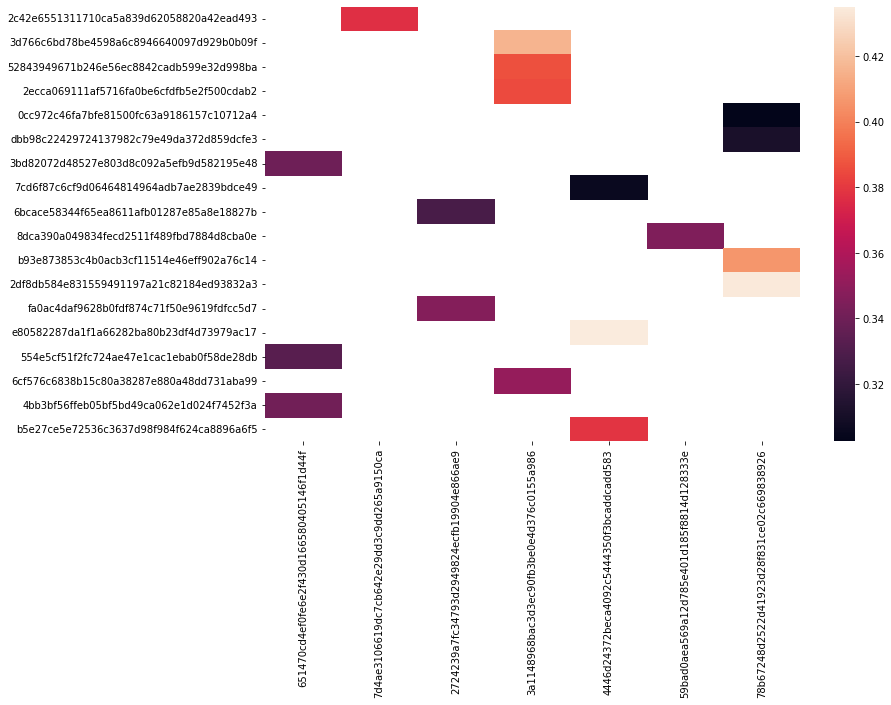

In [108]:
# Visualise the user similarities that are over 0.3 for each of the 10 sampled users
plt.figure(figsize=(12, 8))
sns.heatmap(data = sample_10_matrix)

In [109]:
# NOTE: 3 of the sampled 10 are not on the heatmap
# This is because it was filtered for 0.3 similarity at least, so they have no interactions with any other users large enough 
# Therefore these rows and columns where all nulls and so removed for the visualisation

In [110]:
# -- EDA Complete -- 

In [111]:
# Save sparse matrix to apply in next notebook and construct SVD recommender system 
import scipy.sparse

# Save the existing CSR matrix to a .npz file
scipy.sparse.save_npz('sparse_matrix.npz', sparse_matrix)

In [112]:
# Save dfs for use in next notebook 
triplets_df.to_csv('triplets_df.csv', index = True)
song_df.to_csv('songs_df.csv', index = True)